In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.patches as patches
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#importing mnist dataset from openml
from sklearn.datasets import fetch_openml

In [2]:
#loading the dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [3]:
#data type
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
#list the dataset
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [5]:
#shape of the dataset
mnist.data.shape

(70000, 784)

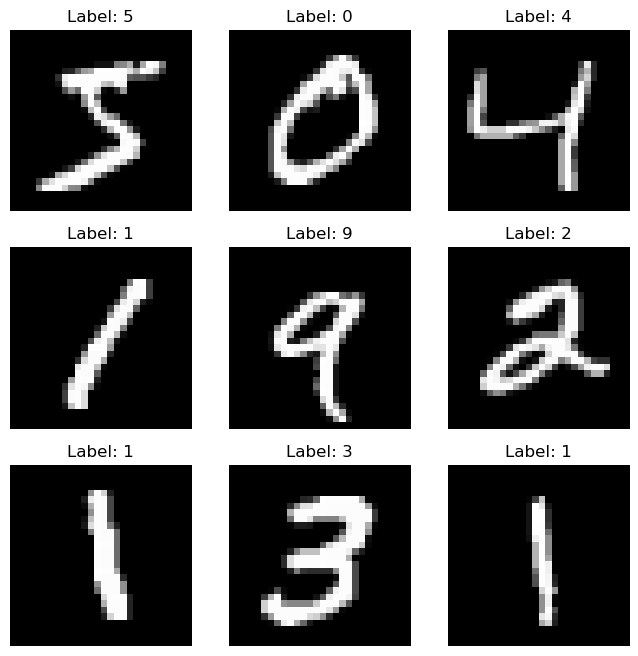

In [6]:
# Display some random samples
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')

The above figure gives show some randomm images from the dataset.

For reference: [For more information](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

In [7]:
# Basic statistical insights
print("Minimum pixel value:", np.min(mnist.data))
print("Maximum pixel value:", np.max(mnist.data))
print("Mean pixel value:", np.mean(mnist.data))
print("Standard deviation of pixel values:", np.std(mnist.data))


Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.385964741253645
Standard deviation of pixel values: 78.65437362689433


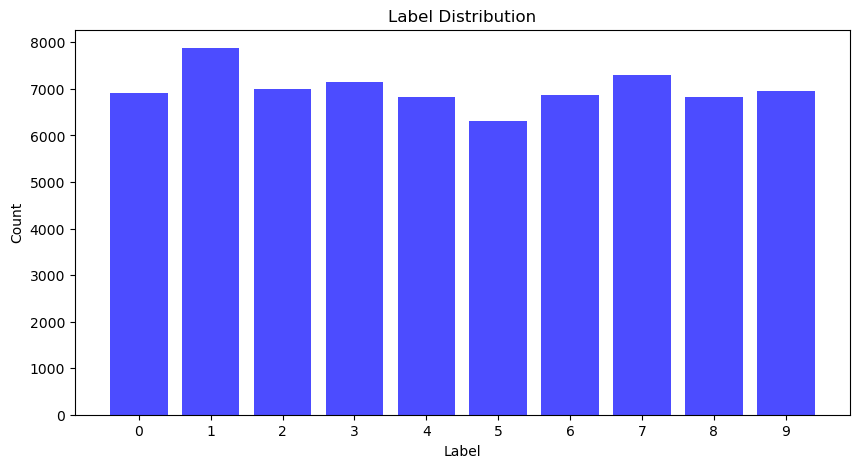

In [8]:
#histogram to visualize the distribution of labels
plt.figure(figsize=(10, 5))
plt.hist(mnist.target.astype(int), bins=np.arange(11) - 0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.xticks(range(10))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


* The graph suggest that the distribution are not uniform. There are more images with labels 0, 1, and 7 compared to other digits.
* This reflects a class imbalance in the dataset, where some digits re more frequent than others.

For reference:[For more information](https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer)

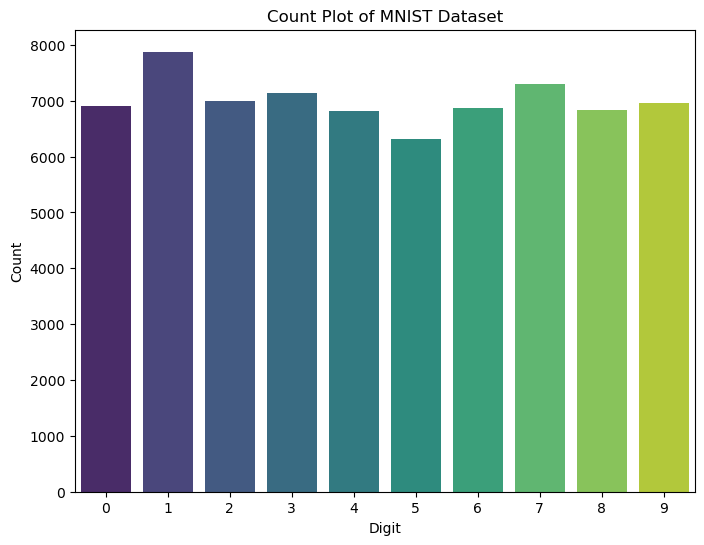

In [9]:
# Plotting the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=mnist.target.astype(int), palette='viridis')
plt.title('Count Plot of MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()


The graph shows the count of each digit in the MNIST dataset.

For reference:[For more information](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [10]:
# Choosing only digits 0, 1, and 2
selected_classes = ['0', '1', '2']

# Filtering the dataset
mask = np.isin(mnist.target, selected_classes)
X_subset = mnist.data[mask]
y_subset = mnist.target[mask]


In [11]:
# Convert target labels to integers
y_subset = y_subset.astype(int)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (17416, 784) (17416,)
Validation set shape: (2177, 784) (2177,)
Test set shape: (2177, 784) (2177,)


Validation Accuracy: 0.981166743224621

Confusion Matrix:
[[673   1   5]
 [  1 819   8]
 [ 15  11 644]]


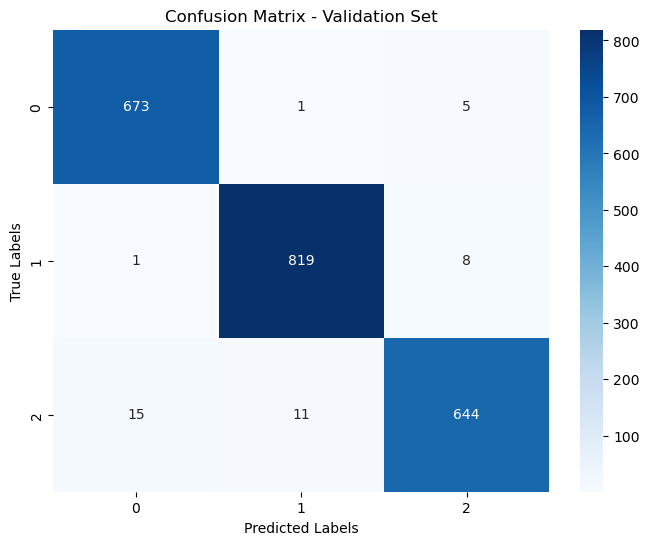


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       679
           1       0.99      0.99      0.99       828
           2       0.98      0.96      0.97       670

    accuracy                           0.98      2177
   macro avg       0.98      0.98      0.98      2177
weighted avg       0.98      0.98      0.98      2177



In [13]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Evaluate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Evaluate precision, recall, and F1 score for each class
class_metrics = classification_report(y_val, y_val_pred, target_names=selected_classes)
print("\nClassification Report:")
print(class_metrics)



The above results provide insights:
* Validation Accuracy: 0.981 which is very high, indicating the model correctly predicts the class.
* In confusion matrix, the diagonal elements are high, indicating most data points are correctly classified.
* Class 2 has slightly higher values, particularly misclassified as Class 1.
* Class 0: Very high precision(0.98), and recall (0.99), ehich indicates the model rarely misclassifies true positive.
* Class 1: Similar results as Class 0.
* Class 2: Slightly lower recall(0.96) compared to other classes.

For reference: [For more information](https://www.kaggle.com/code/thirumani/mnist-svm)

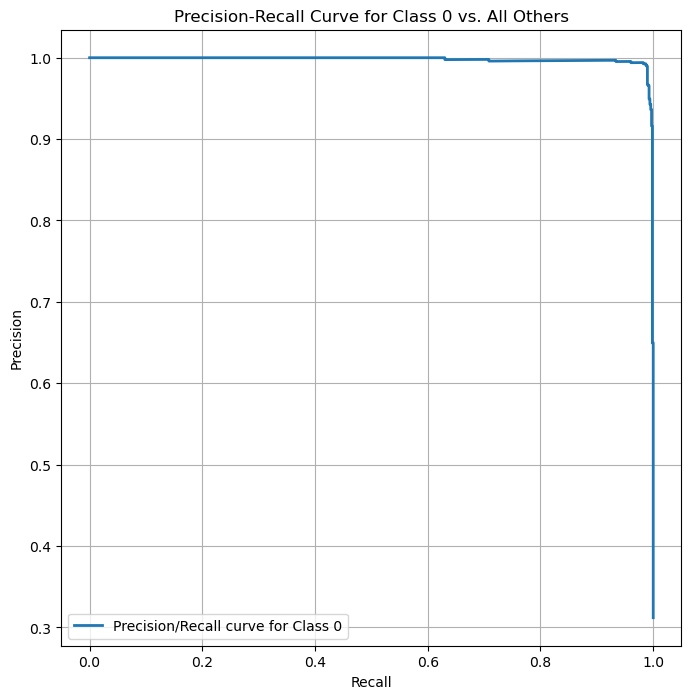

In [14]:
# Convert the labels into binary for the precision-recall curve for class 0
y_val_bin_class_0 = label_binarize(y_val, classes=[0, 1, 2])[:, 0]
y_val_pred_bin_class_0 = label_binarize(y_val_pred, classes=[0, 1, 2])[:, 0]

# Calculate precision and recall for class 0
precision_class_0, recall_class_0, _ = precision_recall_curve(y_val_bin_class_0, svm_classifier.decision_function(X_val)[:, 0])
area_under_curve_class_0 = auc(recall_class_0, precision_class_0)

# Plot the precision-recall curve for class 0
plt.figure(figsize=(8, 8))
plt.plot(recall_class_0, precision_class_0, linewidth=2, label="Precision/Recall curve for Class 0")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve for Class 0 vs. All Others')
plt.grid()
plt.legend(loc="lower left")
plt.show()



* The graph indicates the precision-recall curve for class 0.


For references:
* For label_binarize: [For more information](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html)

* For Precision recall curve: [For more information](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/)

* For classification technique:[For more information](https://medium.com/@mrconnor/pythons-scikit-learn-a-guide-to-advanced-classification-techniques-b571cd0eb296)

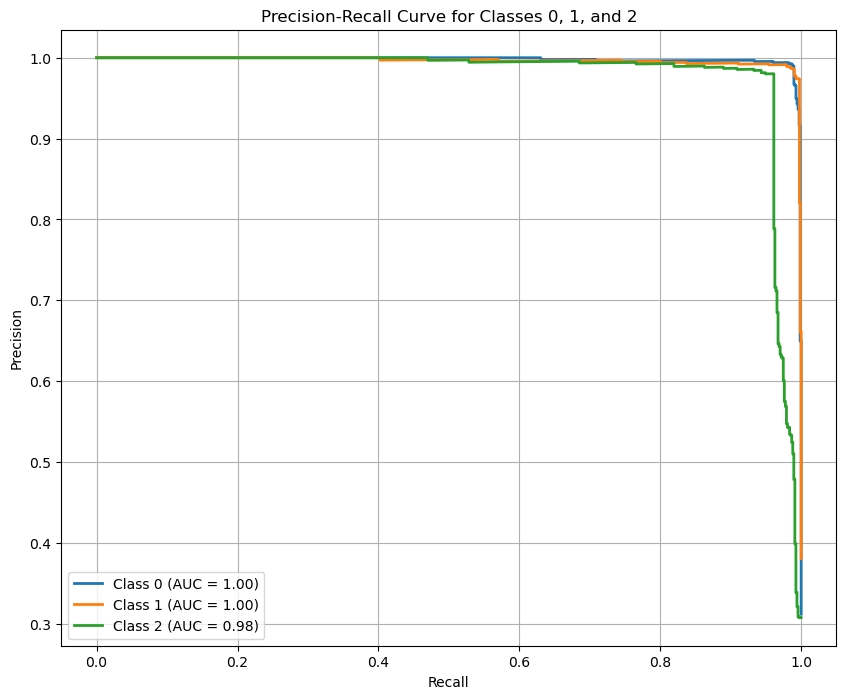

In [15]:
# convert the labels into binary for the precision-recall curve
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop over each class and plot the precision-recall curve
for class_idx in range(3):
    precision, recall, _ = precision_recall_curve(y_val_bin[:, class_idx], svm_classifier.decision_function(X_val)[:, class_idx])
    area_under_curve = auc(recall, precision)
    
    # Plot the precision-recall curve for each class
    plt.plot(recall, precision, label=f'Class {class_idx} (AUC = {area_under_curve:.2f})', linewidth=2)

# Add plot styling
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classes 0, 1, and 2')
plt.grid(True)
plt.legend(loc='best')

# Show the plot
plt.show()


* The graph shows the precision-recall curves for three classes(0, 1, and 2).
* Both Class 0 and Class 1 has similar AUC around 1.00, whereas the Class 2 has slightly lower AUC around 0.98.
* The graph suggests that the SVM classifier is performing well on this multi-class classification task, especially for classes 0 and 1.

For reference: [For more information](https://medium.com/@mrconnor/pythons-scikit-learn-a-guide-to-advanced-classification-techniques-b571cd0eb296)

In [16]:
# Make predictions on the validation set
y_val_pred_scores = svm_classifier.decision_function(X_val)

# Choose a new threshold
new_threshold = 0.5

# adjusting and converting the values into binary
y_val_pred_adjusted = (y_val_pred_scores[:, 1] >= new_threshold).astype(int)

# Evaluate precision, recall, and F1 score 
class_metrics_adjusted = classification_report(y_val, y_val_pred_adjusted, target_names=selected_classes)
print("\nClassification Report After Adjustment:")
print(class_metrics_adjusted)



Classification Report After Adjustment:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       679
           1       0.71      1.00      0.83       828
           2       0.00      0.00      0.00       670

    accuracy                           0.69      2177
   macro avg       0.46      0.66      0.54      2177
weighted avg       0.48      0.69      0.56      2177



C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Precision, Recall, and F1-score: The report shows significantly lower precision for class 0 (original label) and class 1 (predicted label), indicating that many predictions are false positives (classified as 1 when they are actually 0). Class 2 still has zero precision and recall, meaning no instances were correctly classified as 2.
* Macro and Weighted Average: The overall accuracy is 0.69, but the average precision, recall, and F1-score across classes are much lower around 0.5. This suggests the performance is uneven across classes.

In [17]:
# Choose a new threshold for increased recall
new_threshold_recall = -0.5

# adjusting and converting the values into binary
y_val_pred_adjusted_recall = (y_val_pred_scores[:, 1] >= new_threshold_recall).astype(int)

# Evaluate precision, recall, and F1 score 
class_metrics_adjusted_recall = classification_report(y_val, y_val_pred_adjusted_recall, target_names=selected_classes)
print("\nClassification Report After Adjustment:")
print(class_metrics_adjusted_recall)



Classification Report After Adjustment:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       679
           1       0.38      1.00      0.55       828
           2       0.00      0.00      0.00       670

    accuracy                           0.38      2177
   macro avg       0.13      0.33      0.18      2177
weighted avg       0.14      0.38      0.21      2177



C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* The recall for class 1 is now 1.00, meaning all true instances of class 1 are correctly identified.
* However, the precision for class 1 has dropped to 0.38, indicating that many false positives are also being classified as class 1.
* Classes 0 and 2 still have zero precision and recall, suggesting that the model is not effectively distinguishing them.

In [18]:
# Evaluate on the test set
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.9848415250344511


Indicates that the SVM classifier has correctly classified approximately 98.5% of the instances in the test set. 

In [19]:
# Evaluate confusion matrix, precision, recall, and F1 score
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)


Confusion Matrix (Test Set):
[[704   0   3]
 [  0 754  10]
 [ 12   8 686]]


* Class 0 (TP = 704, FP = 0, FN = 12): High accuracy, few missed or false positive predictions.
* Class 1 (TP = 754, FP = 10, FN = 8): High accuracy, few missed but some false positive predictions.
* Class 2 (TP = 686, FP = 3, FN = 6): High accuracy, few missed but some false positive predictions.

In [20]:
class_metrics_test = classification_report(y_test, y_test_pred, target_names=selected_classes)
print("\nClassification Report (Test Set):")
print(class_metrics_test)


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       707
           1       0.99      0.99      0.99       764
           2       0.98      0.97      0.98       706

    accuracy                           0.98      2177
   macro avg       0.98      0.98      0.98      2177
weighted avg       0.98      0.98      0.98      2177



* Each class (0, 1, 2) has very high precision, recall, and F1-score values, all close to 0.99. This indicates that the model is accurately classifying most instances for each class.
* The model is able to correctly identify almost all true positives (high recall) while also minimizing false positives (high precision).
* The macro average and weighted average across all classes also show values close to 0.98, reinforcing the consistent performance across different classes.

#### Conclusion:
* The SVM classifier performs very well on the MNIST dataset for the selected classes (0, 1, and 2).
* Test accuracy = 0.98 indicates consistent performance on unseen data.